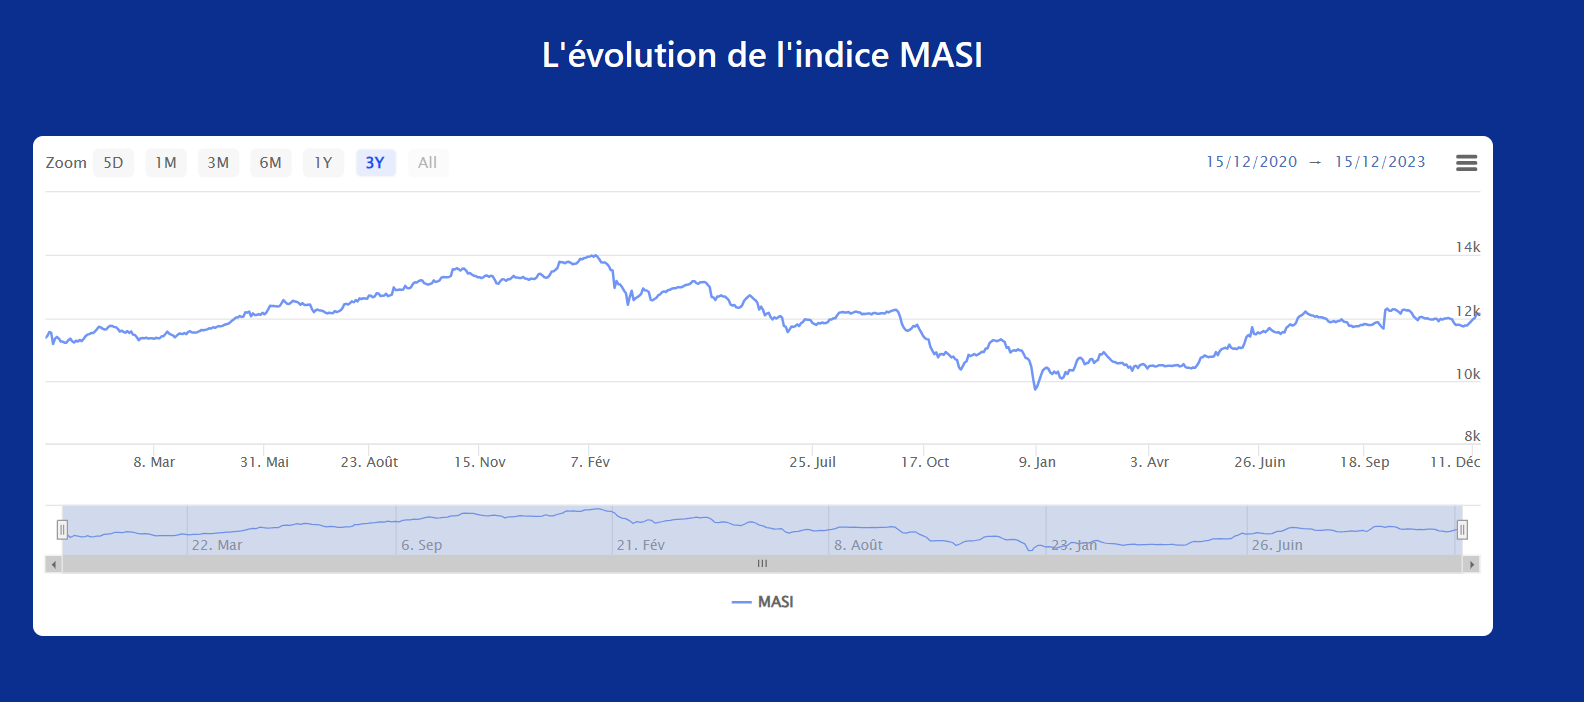

# Étude de Cas : Prédiction de la Performance de l'Indice MASI

**L'objectif de cette étude de cas est de développer un modèle prédictif pour estimer la performance future de l'indice MASI, un indicateur clé du marché boursier marocain, et d'identifier les principaux facteurs qui influencent ses rendements.**

Done by : Tawfiq AADNANE

# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading the DataSet

In [2]:
data = pd.read_excel("/kaggle/input/masi-dataset/Dataset.xlsx")

# Exploratory Data Analysis

In [3]:
data.head()

,SEANCE,INDICE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION
0,2023-12-08 00:00:00.000,MASI,11885.32,11885.32,11824.97,11827.02,11827.02,0.49
1,2023-12-07 00:00:00.000,MASI,11827.02,11827.02,11757.60,11757.60,11757.60,0.59
2,2023-12-06 00:00:00.000,MASI,11757.60,11792.95,11718.07,11759.51,11759.51,-0.02
3,2023-12-05 00:00:00.000,MASI,11759.51,11785.10,11709.49,11728.06,11728.06,0.27
4,2023-12-04 00:00:00.000,MASI,11728.06,11769.43,11702.27,11748.19,11748.19,-0.17


In [4]:
data = data[['SEANCE','COURS_CLOTURE']]

In [5]:
data.head()

,SEANCE,COURS_CLOTURE
0,2023-12-08 00:00:00.000,11885.32
1,2023-12-07 00:00:00.000,11827.02
2,2023-12-06 00:00:00.000,11757.60
3,2023-12-05 00:00:00.000,11759.51
4,2023-12-04 00:00:00.000,11728.06


In [6]:
data['SEANCE'] = pd.to_datetime(data['SEANCE'], format='%Y-%m-%d %H:%M:%S.%f')

In [7]:
data.describe()

,SEANCE,COURS_CLOTURE
count,2366,2366.000000
mean,2018-10-17 20:18:27.692307712,11007.492700
min,2013-12-06 00:00:00,8796.650391
25%,2016-04-25 06:00:00,9927.517578
50%,2018-09-11 00:00:00,11159.635254
75%,2021-01-31 06:00:00,11969.242559
max,2023-12-08 00:00:00,13991.470000
std,NaN,1228.034432


In [8]:
data.head()

,SEANCE,COURS_CLOTURE
0,2023-12-08,11885.32
1,2023-12-07,11827.02
2,2023-12-06,11757.60
3,2023-12-05,11759.51
4,2023-12-04,11728.06


In [9]:
data.isna().sum()

SEANCE           0
COURS_CLOTURE    0
dtype: int64

In [10]:
data.index = data.pop('SEANCE')

In [11]:
data.sort_index(inplace=True)

In [12]:
data.head()

,COURS_CLOTURE
SEANCE,
2013-12-06,9240.41
2013-12-09,9221.40
2013-12-10,9241.40
2013-12-11,9252.30
2013-12-12,9320.66


Text(0, 0.5, 'indice MASI')

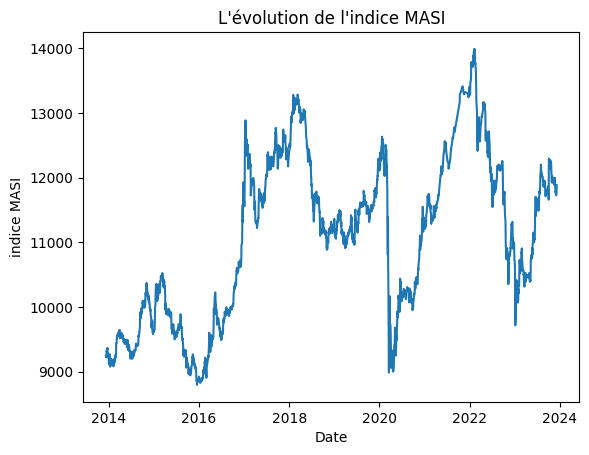

In [13]:
plt.plot(data.index, data['COURS_CLOTURE'])
plt.title("L'évolution de l'indice MASI")
plt.xlabel("Date")
plt.ylabel("indice MASI")

# Seasonal Decomposition

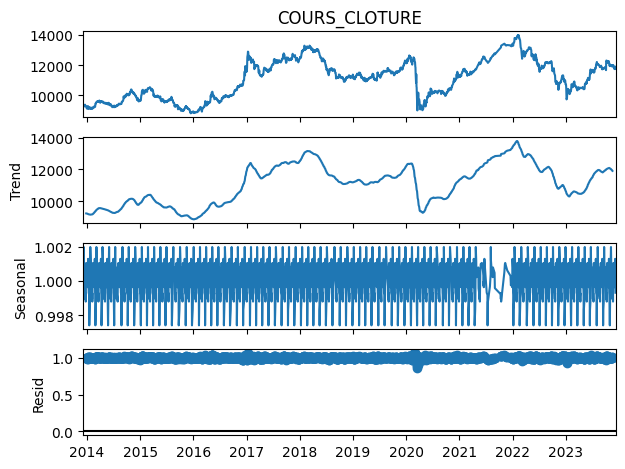

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = data['COURS_CLOTURE']
#result = seasonal_decompose(df.loc[(df.index >= '2022-01-01') & (df.index <= '2022-12-31') ], model='multiplicatif', period=7)
result = seasonal_decompose(df, model='multiplicatif', period=30)

result.plot()
plt.show()


In [15]:
x_values = pd.to_numeric(data.index)  # Convert datetime index to numeric values
y_values = data['COURS_CLOTURE']

print(data['COURS_CLOTURE'].describe()) 
slope, intercept, r_value, p_value, std_err=stats.linregress(x=x_values, y=y_values)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard Error:", std_err)

count     2366.000000
mean     11007.492700
std       1228.034432
min       8796.650391
25%       9927.517578
50%      11159.635254
75%      11969.242559
max      13991.470000
Name: COURS_CLOTURE, dtype: float64
Slope: 7.291899030193555e-15
Intercept: -220.628171612223
R-squared: 0.29439737100182395
P-value: 3.008219254994575e-181
Standard Error: 2.321827986619195e-16


**AdFuller Stationarity Test**

In [16]:
# ADF
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeserie):
    # Determing Rolling statistics
    rolmean = timeserie.rolling(window=7).mean()  #30 Weekly pattern
    rolstd = timeserie.rolling(window=7).std()

    # Plot original data, rolling mean, and rolling standard deviation
    plt.figure(figsize=(10, 6))
    plt.plot(timeserie, label='Original Data')
    plt.plot(rolmean, label='Rolling Mean (window=7)')
    plt.plot(rolstd, label='Rolling Std Dev (window=7)')
    plt.xlabel('jour')
    plt.ylabel('indice MASI')
    plt.title('Rolling Mean and Standard Deviation')
    plt.legend()
    plt.show()

    #ADCF
    result = adfuller(timeserie)
    output = pd.Series(result[0:4], index = ['ADF Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in result[4].items():
        output['Critical Value (%s)'%key] = value
    print(output)

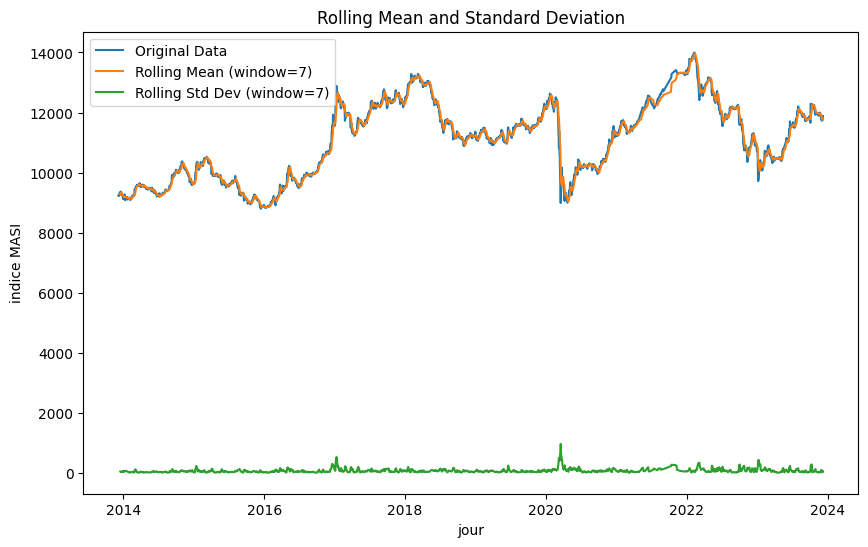

ADF Statistic                    -2.383758
p-value                           0.146373
#Lags Used                       13.000000
Number of Observations Used    2352.000000
Critical Value (1%)              -3.433133
Critical Value (5%)              -2.862770
Critical Value (10%)             -2.567425
dtype: float64


In [17]:
test_stationary(data['COURS_CLOTURE'])

# Features Engineering

**The idea is to predict the MASI index for day j using data from the previous three days, like a supervised prediction task.**

In [18]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)


def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)
    target_date = first_date
    dates = []
    X, Y = [], []
    last_time = False

    while True:
        df_subset = dataframe.loc[:target_date].tail(n + 1)
        if len(df_subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['COURS_CLOTURE'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)
        
        next_date = dataframe.index[dataframe.index > target_date].min()
        
        if pd.isnull(next_date) or next_date > last_date:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Indice Date'] = dates
    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Indice jour-{n-i}'] = X[:, i]

    ret_df['Indice'] = Y

    return ret_df


In [19]:
windowed_data = df_to_windowed_df(data,'2013-12-11','2023-12-08',n=3) 

In [20]:
windowed_data

,Indice Date,Indice jour-3,Indice jour-2,Indice jour-1,Indice
0,2013-12-11,9240.41,9221.40,9241.40,9252.30
1,2013-12-12,9221.40,9241.40,9252.30,9320.66
2,2013-12-13,9241.40,9252.30,9320.66,9315.57
3,2013-12-16,9252.30,9320.66,9315.57,9354.52
4,2013-12-17,9320.66,9315.57,9354.52,9349.76
...,...,...,...,...,...
2358,2023-12-04,11784.33,11781.56,11748.19,11728.06
2359,2023-12-05,11781.56,11748.19,11728.06,11759.51
2360,2023-12-06,11748.19,11728.06,11759.51,11757.60
2361,2023-12-07,11728.06,11759.51,11757.60,11827.02


In [21]:
windowed_data.set_index('Indice Date', inplace=True)

In [22]:
def create_features(data):
    """
    Create time series features based on time series index.
    """
    # Create a copy of the DataFrame to avoid modifying the original data
    df = data.copy()
    
    # Extract day of the week (0 = Monday, 4 = Friday)
    df['dayofweek'] = df.index.dayofweek
    
    # Extract the quarter of the year (1 to 4)
    df['quarter'] = df.index.quarter
    
    # Extract the month of the year (1 to 12)
    df['month'] = df.index.month
    
    # Extract the day of the month
    df['day'] = df.index.day
    
    # Calculate the season (1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall)
    df['season'] = df['month'] % 12 // 3 + 1
    
    # Extract the day of the year (1 to 365/366)
    df['dayofyear'] = df.index.dayofyear
    
    
    # Extract the week of the year (ISO week date system)
    df['weekofyear'] = df.index.isocalendar().week
    
    # Additional features

    # Check if the day is the start of the month (1 if it is, 0 otherwise)
    df['is_month_start'] = (df['day'] == 1).astype(int)
    
    # Check if the day is the end of the month (1 if it is, 0 otherwise)
    df['is_month_end'] = (df['day'] == df.index.days_in_month).astype(int)
    
    # Check if the day is the start of a quarter (1 if it is, 0 otherwise)
    df['is_quarter_start'] = (df['day'] == 1) & (df['month'] % 3 == 1).astype(int)
    df['days_since_start_of_year'] = (df.index - pd.to_datetime(df.index.year, format='%Y')).days

    # Return the DataFrame with added features and holiday columns
    return df.astype(float)

In [23]:
new_data = create_features(windowed_data)

In [24]:
new_data.head()

,Indice jour-3,Indice jour-2,Indice jour-1,Indice,dayofweek,quarter,month,day,season,dayofyear,weekofyear,is_month_start,is_month_end,is_quarter_start,days_since_start_of_year
Indice Date,,,,,,,,,,,,,,,
2013-12-11,9240.41,9221.40,9241.40,9252.30,2.0,4.0,12.0,11.0,1.0,345.0,50.0,0.0,0.0,0.0,344.0
2013-12-12,9221.40,9241.40,9252.30,9320.66,3.0,4.0,12.0,12.0,1.0,346.0,50.0,0.0,0.0,0.0,345.0
2013-12-13,9241.40,9252.30,9320.66,9315.57,4.0,4.0,12.0,13.0,1.0,347.0,50.0,0.0,0.0,0.0,346.0
2013-12-16,9252.30,9320.66,9315.57,9354.52,0.0,4.0,12.0,16.0,1.0,350.0,51.0,0.0,0.0,0.0,349.0
2013-12-17,9320.66,9315.57,9354.52,9349.76,1.0,4.0,12.0,17.0,1.0,351.0,51.0,0.0,0.0,0.0,350.0


In [25]:
X = new_data.drop(['Indice'] , axis=1)

In [26]:
y = new_data['Indice']

In [27]:
dates = new_data.index

# Train Test Split Data

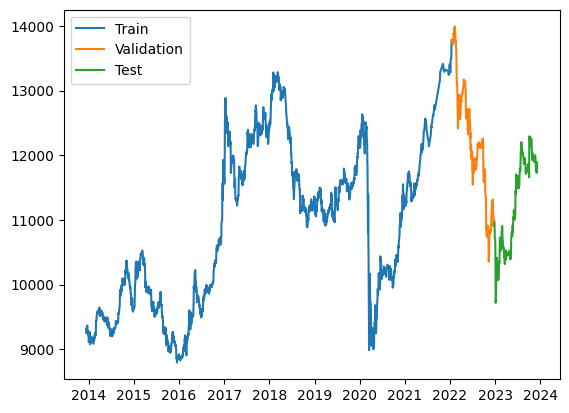

In [28]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [29]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1890, 14), (1890,), (236, 14), (236,))

In [30]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_series = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

print('Train set shape', X_train_series.shape)
print('Validation set shape', X_val_series.shape)
print('Test set shape', X_test_series.shape)

Train set shape (1890, 14, 1)
Validation set shape (236, 14, 1)
Test set shape (237, 14, 1)


# Train Xgboost Model 

In [31]:
import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', epochs = 300, batch_size = 32, random_state=42)

model.fit(X_train,y_train, eval_set=[(X_val, y_val)])   

[0]	validation_0-rmse:1194.68982
[1]	validation_0-rmse:884.61221
[2]	validation_0-rmse:663.71419
[3]	validation_0-rmse:514.24588
[4]	validation_0-rmse:406.74870
[5]	validation_0-rmse:326.44109
[6]	validation_0-rmse:278.48839
[7]	validation_0-rmse:240.21550
[8]	validation_0-rmse:210.76335
[9]	validation_0-rmse:197.79930
[10]	validation_0-rmse:180.83694
[11]	validation_0-rmse:170.82286
[12]	validation_0-rmse:167.76055
[13]	validation_0-rmse:165.19817
[14]	validation_0-rmse:162.92883
[15]	validation_0-rmse:158.95015
[16]	validation_0-rmse:155.86257
[17]	validation_0-rmse:154.40921
[18]	validation_0-rmse:152.59374
[19]	validation_0-rmse:152.28331
[20]	validation_0-rmse:152.44798
[21]	validation_0-rmse:152.08255
[22]	validation_0-rmse:151.77488
[23]	validation_0-rmse:151.81899
[24]	validation_0-rmse:151.81923
[25]	validation_0-rmse:151.61910
[26]	validation_0-rmse:151.73595
[27]	validation_0-rmse:151.88917
[28]	validation_0-rmse:151.98374
[29]	validation_0-rmse:151.97770
[30]	validation_0-r

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [01:23:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "batch_size", "epochs" } are not used.

  warnings.warn(smsg, UserWarning)


[59]	validation_0-rmse:153.68718
[60]	validation_0-rmse:153.68224
[61]	validation_0-rmse:153.68016
[62]	validation_0-rmse:153.76236
[63]	validation_0-rmse:154.08235
[64]	validation_0-rmse:154.03997
[65]	validation_0-rmse:153.94146
[66]	validation_0-rmse:153.58597
[67]	validation_0-rmse:154.12776
[68]	validation_0-rmse:154.23000
[69]	validation_0-rmse:154.24040
[70]	validation_0-rmse:154.33778
[71]	validation_0-rmse:154.33827
[72]	validation_0-rmse:154.17249
[73]	validation_0-rmse:154.17102
[74]	validation_0-rmse:154.27894
[75]	validation_0-rmse:154.28013
[76]	validation_0-rmse:154.19072
[77]	validation_0-rmse:154.19003
[78]	validation_0-rmse:153.86081
[79]	validation_0-rmse:153.93155
[80]	validation_0-rmse:153.93084
[81]	validation_0-rmse:153.92906
[82]	validation_0-rmse:153.92949
[83]	validation_0-rmse:153.90401
[84]	validation_0-rmse:154.08855
[85]	validation_0-rmse:154.28101
[86]	validation_0-rmse:154.28043
[87]	validation_0-rmse:154.25858
[88]	validation_0-rmse:154.53276
[89]	valid

XGBRegressor(base_score=None, batch_size=32, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, epochs=300, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, ...)

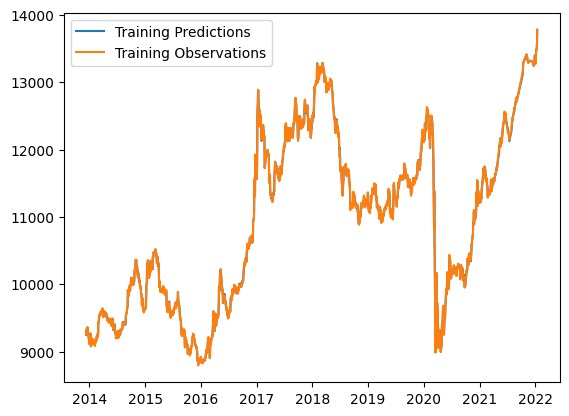

In [32]:
train_predictions = model.predict(X_train)

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

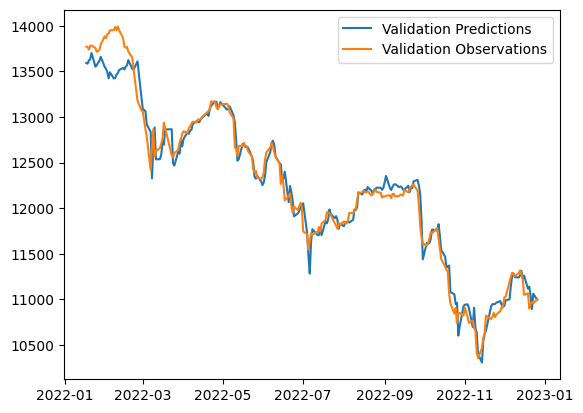

In [33]:
val_predictions = model.predict(X_val)

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

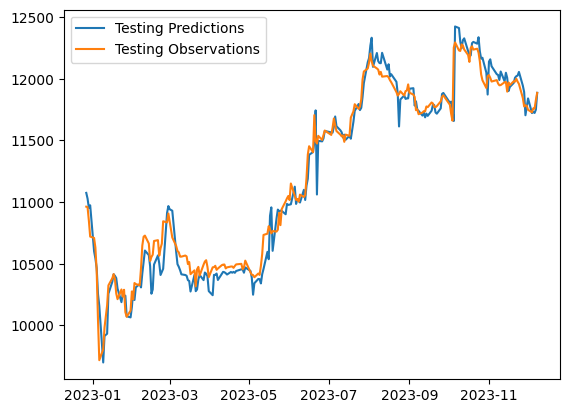

In [34]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

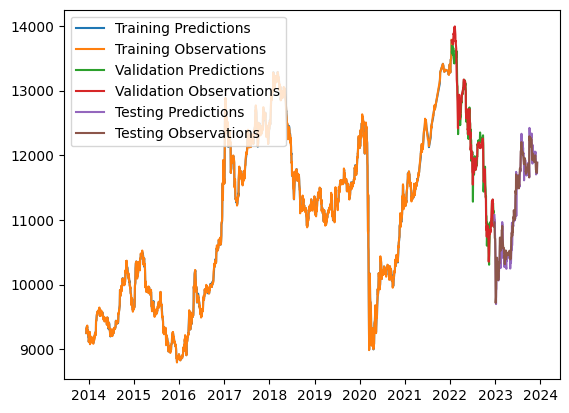

In [35]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

# Model Performance

In [36]:
y_pred = model.predict(X_val)


# Calculate R-squared (R2)
r2 = r2_score(y_val, y_pred)

print(f'R-squared (R2): {r2}')


R-squared (R2): 0.9701083662543439
